## Importing Libraries

In [33]:
import pandas as pd
import numpy as np

from glob import glob # serve para listar os arquivos das imagens

# Bibliotecas para imagens
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pylab as pltlab

## Reading images

### Listing Images

In [34]:
# test
test_datasets = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\test\*jpg')
dry_skins_for_test = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\test\dry\*jpg')
normal_skins_for_test = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\test\normal\*jpg')
oily_skins_for_test = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\test\oily\*jpg')

# Train
train_datasets = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\train\*jpg')
dry_skins_for_train = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\train\dry\*jpg')
normal_skins_for_train = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\train\normal\*jpg')
oily_skins_for_train = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\train\oily')

# Valid
validation_datasets = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\valid\*jpg')
dry_skins_valid = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\valid\dry\*jpg')
normal_skins_valid = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\valid\normal\*jpg')
oily_skins_valid = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\valid\oily\*jpg')

In [65]:
dataset_dir = os.path.join(os.getcwd(), 'skin_search')


dataset_test_dir = os.path.join(dataset_dir, 'test')
dataset_test_dry_len = len(os.listdir(os.path.join(dataset_test_dir, 'dry')))
dataset_test_normal_len = len(os.listdir(os.path.join(dataset_test_dir, 'normal')))
dataset_test_oily_len = len(os.listdir(os.path.join(dataset_test_dir, 'oily')))

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_dry_len = len(os.listdir(os.path.join(dataset_train_dir, 'dry')))
dataset_train_normal_len = len(os.listdir(os.path.join(dataset_train_dir, 'normal')))
dataset_train_oily_len = len(os.listdir(os.path.join(dataset_train_dir, 'oily')))

dataset_validation_dir = os.path.join(dataset_dir, 'valid')
dataset_validation_dry_len = len(os.listdir(os.path.join(dataset_validation_dir, 'dry')))
dataset_validation_normal_len = len(os.listdir(os.path.join(dataset_validation_dir, 'normal')))
dataset_validation_oily_len = len(os.listdir(os.path.join(dataset_validation_dir, 'oily')))

print('-------------- QUANTIDADE DE IMAGENS -------------')
print('\n\nTest dry: %s' % dataset_test_dry_len)
print('Test normal: %s' % dataset_test_normal_len)
print('Test oily: %s' % dataset_test_oily_len)
print('--------------------------------------------------')
print('Train dry: %s' % dataset_train_dry_len)
print('Train normal: %s' % dataset_train_normal_len)
print('Train oily: %s' % dataset_train_oily_len)
print('--------------------------------------------------')
print('Validation dry: %s' % dataset_validation_dry_len)
print('Validation normal: %s' % dataset_validation_normal_len)
print('Validation oily: %s' % dataset_validation_oily_len)

-------------- QUANTIDADE DE IMAGENS -------------


Test dry: 35
Test normal: 59
Test oily: 40
--------------------------------------------------
Train dry: 652
Train normal: 1105
Train oily: 1000
--------------------------------------------------
Validation dry: 71
Validation normal: 111
Validation oily: 80


### Pixel values from the images

In [66]:
img_plt = plt.imread(dry_skins_for_test[1])

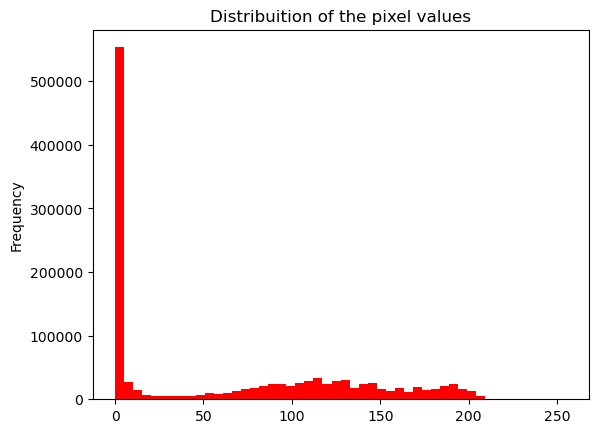

In [67]:
pd.Series(img_plt.flatten()).plot(kind='hist', bins=50, color = 'red',
                                  title='Distribuition of the pixel values')
plt.show()

## Image preprocessing for model training

In [71]:
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (img_width, img_height)
img_shape = img_size + (img_color_channel,)

batch_size = 32 # quantidade de features q eu vou trazer por vez do meu dataset
epochs = 20 # número de vezes em que eu vou passar pelo meu dataset inteiro
learning_rate = 0.0001

class_names = ['dry', 'normal', 'oily']

In [73]:
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_test_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 134 files belonging to 3 classes.


In [72]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 2757 files belonging to 3 classes.


In [74]:
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 262 files belonging to 3 classes.


In [75]:
# Caso eu não tivesse um dataset de testes e precisasse criá-lo proderiamos fazer isso da seguinte forma:

dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

Validation Dataset Cardinality: 8
Test Dataset Cardinality: 1


## Dataset Images Plot

In [81]:
def plot_dataset(dataset):
    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dataset.take(1):

        for i in range(9):
            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])

<Figure size 640x480 with 0 Axes>

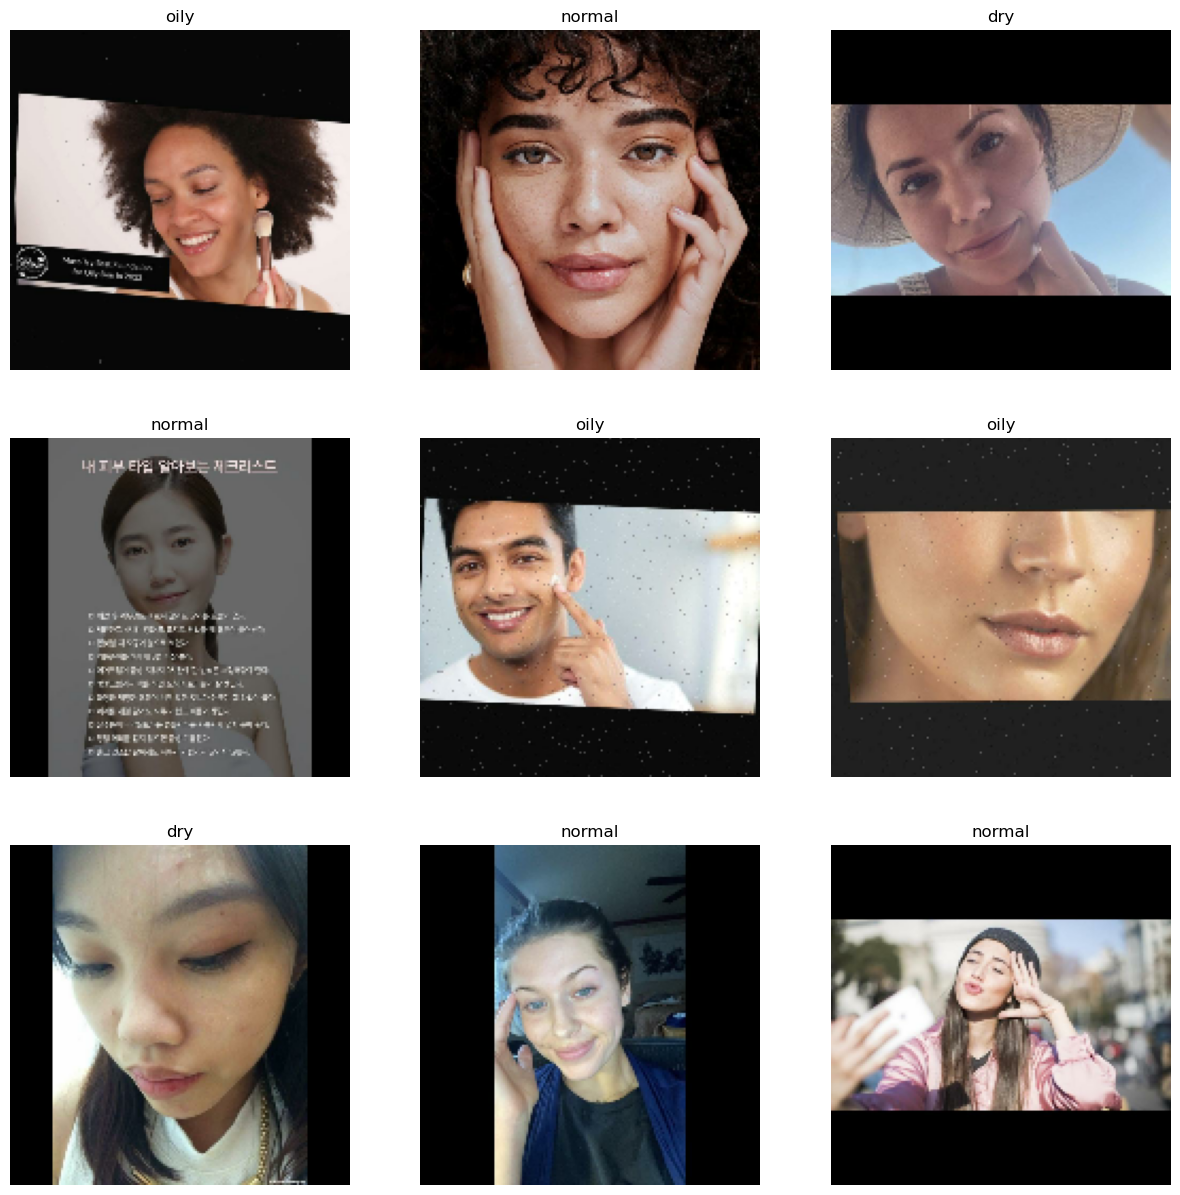

In [82]:
plot_dataset(dataset_train)

<Figure size 640x480 with 0 Axes>

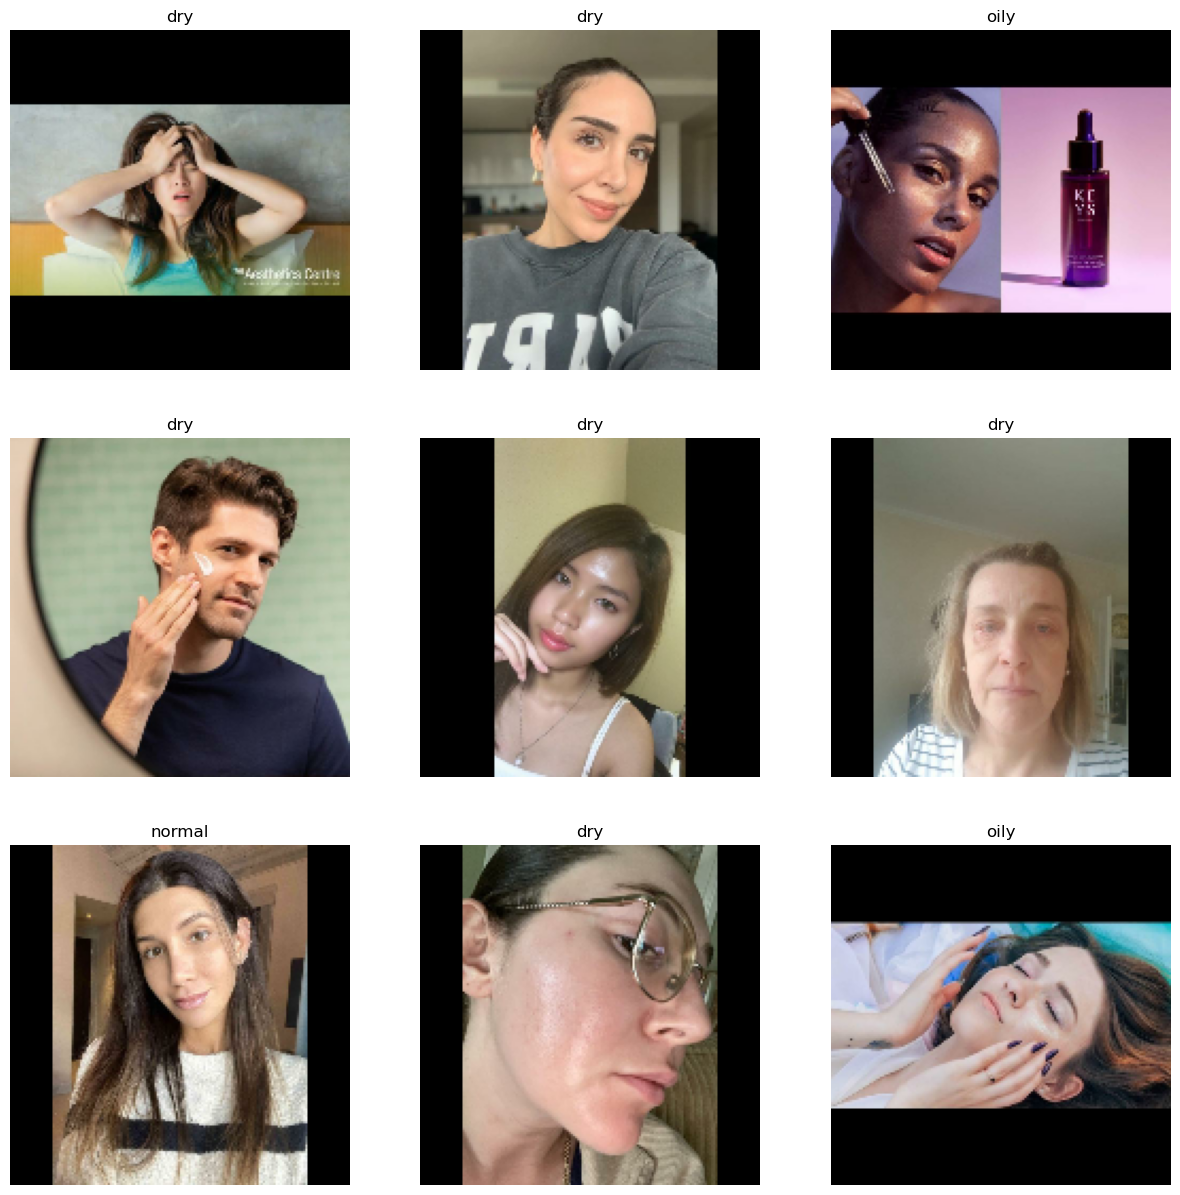

In [83]:
plot_dataset(dataset_test)

<Figure size 640x480 with 0 Axes>

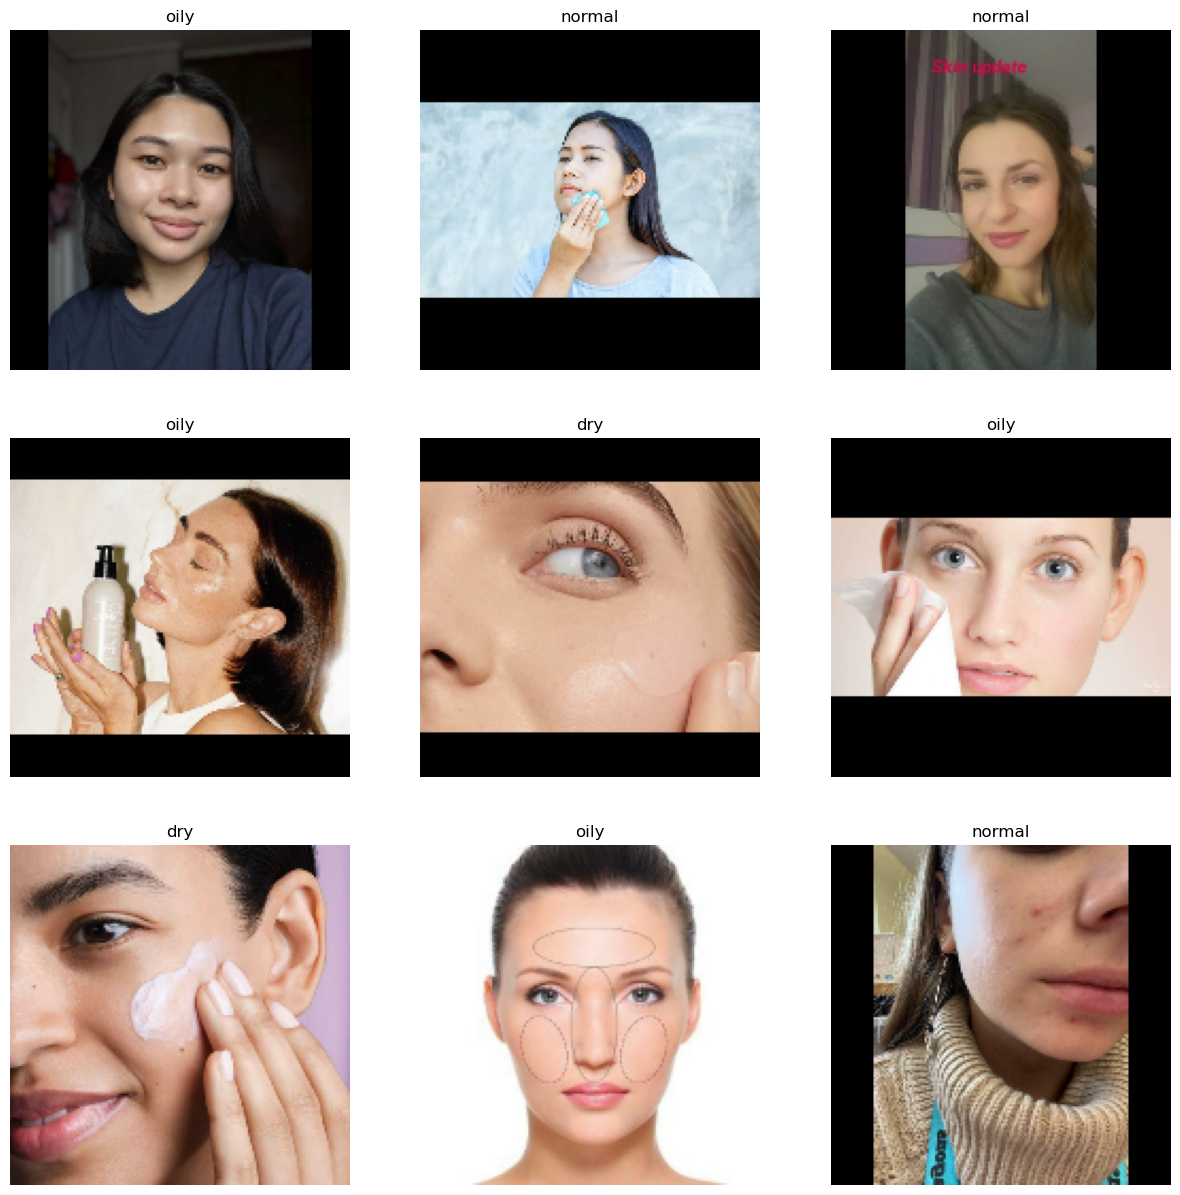

In [84]:
plot_dataset(dataset_validation)

# Creating a Machine Learning Supervised Learning model - type Image Classification

### Model

In [89]:
model = tf.keras.models.Sequential([
    tf.keras.experimental.preprocessing.Rescaling(
        1. / image_color_channel_size,
        input_shape = image_shape
    ),
    
    tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'), # arrumar isso pq senão só vai retornar 2 e eu preciso de 3
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

AttributeError: module 'keras._tf_keras.keras' has no attribute 'experimental'